In [583]:
#Importing All the Necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

In [584]:
test_data=pd.read_csv('coronaTest.csv') # Reading the data given as a csv file that has to checked for test
test_data.head()

,Index,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0,2360.468121,3170.244556,1697.758472,5598.597705,-1122.907590,980.658815,1178.046905,3296.901426,549.362795,...,31.733982,18.159848,62.793697,26.542204,20.632675,11.898688,24.426936,12.326023,2.524550,23.820559
1,1,9824.143037,3357.881942,201.543848,3019.119601,-4953.704512,-666.601915,192.440353,4142.487313,2262.905200,...,6.011481,46.987701,-23.835829,14.808673,5.638663,-16.839797,20.230744,-1.293179,82.583835,59.123195
2,2,2341.483987,1972.182132,5321.074820,2076.880657,-1057.674537,550.924115,2006.304348,-920.764523,-639.762922,...,29.900149,-16.289829,-31.641735,-11.114851,-2.929377,-58.487379,6.710407,1.146231,24.553120,-35.122233
3,3,9588.800823,10121.225552,7233.253861,-495.263472,-1506.855675,2146.521265,-2909.550994,878.050546,2200.871095,...,18.709080,8.423986,5.825512,-41.753367,-16.802495,-25.847536,-25.330617,13.822268,10.729671,-5.975498
4,4,2902.667817,2847.755305,3424.176309,5046.393309,-1387.708023,-1713.565415,3364.930083,-253.248893,-3011.743840,...,26.846112,52.430472,102.027308,-72.852526,-24.766511,26.342181,-18.998844,18.412844,-0.115226,15.015220


In [585]:
print(test_data.shape)
print(test_data.isnull().values.any()) # Checking if there exits any null value in the dataset

(1332, 1001)
False


In [586]:
data=pd.read_csv('coronaTrain.csv') # # Reading the training data given as a csv file to create the neural network model
data.head()

,Index,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,status
0,0,5280.167730,3837.700942,1681.942638,5843.046523,-232.842418,818.394788,3030.753422,2277.569997,573.577558,...,-11.788928,-4.290970,2.594959,-43.219612,-4.240717,31.517564,-41.453802,17.277788,-20.736469,0
1,1,-3223.055169,-1115.166494,-1336.564180,1286.738497,3403.835973,1036.306212,-401.889306,323.775792,1494.498731,...,-86.010820,-31.261799,103.364060,46.960054,-62.536342,-92.178920,-39.621644,-7.973821,-30.334445,1
2,2,8007.313938,5491.331210,3663.342202,593.011444,-2989.930294,-1650.875980,1118.997993,2391.424050,2575.013614,...,20.228240,-22.978302,-68.078558,-10.060078,-19.974270,43.649501,-40.868866,-88.093409,7.586640,0
3,3,4533.969789,1859.902341,-2106.670412,-2938.184416,-1435.850576,-1167.242348,-476.518632,-215.481546,-1838.518402,...,-0.340331,-47.293885,-7.099134,-1.138214,-2.997165,20.675353,5.936402,80.723711,-58.106523,1
4,4,921.522640,-1200.312956,-14.678130,1779.298398,-3506.129638,855.198666,-943.207950,-1956.808320,320.996880,...,20.692532,-90.675207,-25.654549,46.343281,-9.284992,82.467545,13.337126,-61.225668,15.347131,1


In [587]:
print(data.shape)
print(data.isnull().values.any()) # Checking if there exits any null value in the dataset

(1287, 1002)
False


In [588]:
m=data.corr() # Getting the correlation matrix

In [589]:
index=[]
for i in range(len(m.iloc[:,-1])):  # Created the an array with index of the columns that associate theselves with a higher correlation to the 'Status' column
    if abs(m['status'][i])>0.20:
        index.append(i);

In [590]:
index.pop() # Removing the last index i.e. of the 'Status' column itself

1001

In [591]:
test_list = [str(i) for i in index]

Column  1   -0.44055638929705615
Column  2   -0.7057043766444717
Column  3   -0.33733617247579384
Column  8   -0.3485427831621467
Column  10   0.3864013631447074
Column  11   -0.607194166285778
Column  16   -0.22193016405952068
Column  21   -0.2475662985244077
Column  22   -0.2700331548516934
Column  28   -0.2214662601221562
Column  33   -0.2015763665312899
Column  35   0.2162741301088741
Column  61   -0.21671850689764488
Column  62   0.2214610940727301


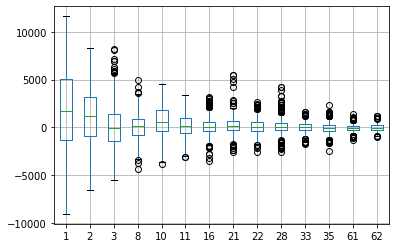

In [592]:
data.boxplot(column=(test_list))
for i in index:
    print("Column ",i," ",m['status'][i]) # Plotting the boxplot of the 'Status' column for columns that have a correlation >0.2

In [593]:
q1=data['3'].quantile(0.75)
q3=data['3'].quantile(0.25)
IQR=q1-q3
outlier=(data['3']>(q1+1.5*IQR)) | (data['3']<(q3-1.5*IQR)) # Replacing the oultier with median value
median=float(data['3'].median())
data["3"] = np.where(outlier, median, data["3"])
data.shape

(1287, 1002)

In [594]:
q1=data['28'].quantile(0.75)
q3=data['28'].quantile(0.25)
IQR=q1-q3
outlier=(data['28']>(q1+1.5*IQR)) | (data['28']<(q3-1.5*IQR)) # Replacing the oultier with median value
median=float(data['28'].median())
data["28"] = np.where(outlier, median, data["28"])
data.shape

(1287, 1002)

In [595]:
q1=data['16'].quantile(0.75)
q3=data['16'].quantile(0.25)
IQR=q1-q3
outlier=(data['16']>(q1+1.5*IQR)) | (data['16']<(q3-1.5*IQR)) # Replacing the oultier with median value
median=float(data['16'].median())
data["16"] = np.where(outlier, median, data["16"])
data.shape

(1287, 1002)

In [596]:
q1=data['21'].quantile(0.75)
q3=data['21'].quantile(0.25)
IQR=q1-q3
outlier=(data['21']>(q1+1.5*IQR)) | (data['21']<(q3-1.5*IQR)) # Replacing the oultier with median value
median=float(data['21'].median())
data["21"] = np.where(outlier, median, data["21"])
data.shape

(1287, 1002)

In [597]:
q1=data['22'].quantile(0.75)
q3=data['22'].quantile(0.25)
IQR=q1-q3
outlier=(data['22']>(q1+1.5*IQR)) | (data['22']<(q3-1.5*IQR)) # Replacing the oultier with median value
median=float(data['22'].median())
data["22"] = np.where(outlier, median, data["22"])
data.shape

(1287, 1002)

In [598]:
data.info() # Checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Columns: 1002 entries, Index to status
dtypes: float64(1000), int64(2)
memory usage: 9.8 MB


In [599]:
x=data.drop(columns=['status','Index']) # X the feature set to create the model
y=data[['status']] # Y the target value 

In [600]:
x.shape

(1287, 1000)

In [601]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)  # Test and Train split

Train on 1029 samples, validate on 258 samples
Epoch 1/20
1029/1029 [==============================] - 0s 440us/sample - loss: 79.5220 - accuracy: 0.7357 - val_loss: 14.6801 - val_accuracy: 0.8760
Epoch 2/20
1029/1029 [==============================] - 0s 194us/sample - loss: 14.3679 - accuracy: 0.9174 - val_loss: 6.5382 - val_accuracy: 0.9419
Epoch 3/20
1029/1029 [==============================] - 0s 160us/sample - loss: 11.5795 - accuracy: 0.9378 - val_loss: 7.2225 - val_accuracy: 0.9380
Epoch 4/20
1029/1029 [==============================] - 0s 170us/sample - loss: 8.2513 - accuracy: 0.9436 - val_loss: 5.6197 - val_accuracy: 0.9457
Epoch 5/20
1029/1029 [==============================] - 0s 173us/sample - loss: 7.2371 - accuracy: 0.9611 - val_loss: 5.2895 - val_accuracy: 0.9496
Epoch 6/20
1029/1029 [==============================] - 0s 161us/sample - loss: 2.6675 - accuracy: 0.9670 - val_loss: 5.6891 - val_accuracy: 0.9419
Epoch 7/20
1029/1029 [==============================] - 0s 18

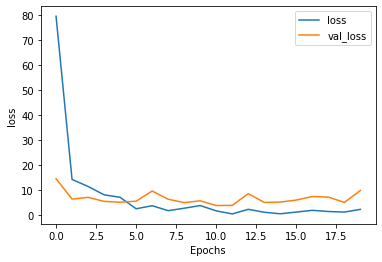

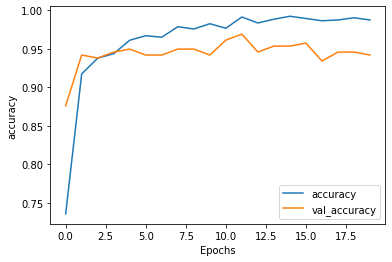

In [607]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=(1000,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
])
## Sequential Neural Network with relu activation and Dropout Parameter to introduce Regularisation

model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy') # Using adam optimiser and Categorical Entropy Loss
history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=20)

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
plot_graphs(history,'loss') # Plotting accuracy and los on validation and training data 
plot_graphs(history,'accuracy')

In [608]:
x_check=test_data.drop(columns=['Index']) ## Predict on the given Test Data
y_predict=model.predict(x_check)

In [609]:
lst=[]
for i in y_predict_tan:
    if i[0]>0.5:
        lst.append(0)
    elif i[1]>0.5:  
        lst.append(1)
    else:
        lst.append(2)
# Converting the one hot encoded values to discrete integer values        

In [610]:
df=pd.DataFrame(lst)
df=df.rename(columns={0:'Status'}) # Converting the list to dataframe
df.head()

,Status
0,0
1,0
2,2
3,0
4,0


In [611]:
df.to_csv('submission_fin.csv') # Storing as submission_fin.csv